---
## **health insurance charge analysis and prediction** 
---

### **Objectives of this Analysis**
* Understanding the factors influencing the insurance charge:
    * Identify key demographic and lifestyle factors that significantly impact insurance charges.
    * Analyze the relationship between variables such as age, gender, BMI, smoking status, and insurance charges.
    * Explore how regional differences and medical history contribute to variations in insurance charges.
* Building a predictive model for regression purposes:
    * Develop a robust regression model to predict insurance charges based on the identified factors.
    * Evaluate the performance of different regression algorithms and select the best model.
    * Use the predictive model to provide insights and recommendations for insurance pricing strategies.

### **Dataset Overview**
The dataset used in this analysis contains health insurance data with the following columns:

* `Unnamed: 0`: Index column
* `age`: Age of the insured
* `gender`: Gender of the insured
* `bmi`: Body Mass Index of the insured
* `children`: Number of children/dependents covered by the insurance
* `smoker`: Smoking status of the insured
* `region`: Residential region of the insured
* `medical_history`: Medical history of the insured
* `family_medical_history`: Family medical history of the insured
* `exercise_frequency`: Frequency of exercise of the insured
* `occupation`: Occupation of the insured
* `coverage_level`: Level of insurance coverage
* `charges`: Insurance charges billed to the insured

### **Dataset Summary**
* Total entries: 561,672
* Total columns: 13

### **Column Data Types**
* `age`: int64
* `gender`: object
* `bmi`: float64
* `children`: int64
* `smoker`: object
* `region`: object
* `medical_history`: object
* `family_medical_history`: object
* `exercise_frequency`: object
* `occupation`: object
* `coverage_level`: object
* `charges`: float64



In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from skimpy import skim
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('insurance_data.csv')

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 561672 │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column       ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0    ┃ p25     ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Unnamed: 0   │   0 │     0 │   500100 │   288700 │     1 │  250000 │  500000 │  750300 │  1000000 │ ▇▇▇▇▇▇ │  │
│ │ age          │   0 │     0 │    41.49 │    13.86 │    18 │      29 │      41 │      53 │       65 │ ▇▇▇▇▇▇ │  │
│ │ bmi          │   0 │     0 │    33.99 │    9.235 │    18 │   26.01 │   33.96 │   41.99 │       50 │ ▇▇▇▇▇▇ │  │
│ │ children     │   0 │     0 │    2.499 │    1.708 │     0 │       1 │       2 │       4 │        5 │ ▇▇▇▇▇▇ │  │
│ │ charges      │   0 │     0 │    18070 │     4276 │  5611 │   15030 │   18020 │   21040 │    32560 │ ▁▅▇▆▂  │  │
│ └──────────────┴─────┴───────┴──────────┴──────────┴───────┴─────────┴─────────┴─────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ gender    │  0 │    0 │ male      │ female    │ female    │ male      │         5 │         1 │     561672 │  │
│ │ smoker    │  0 │    0 │ no        │ yes       │ no        │ yes       │       2.5 │         1 │     561672 │  │
│ │ region    │  0 │    0 │ northwest │ northwest │ northeast │ southwest │         9 │         1 │     561672 │  │
│ │ medical_h │  0 │    0 │ Diabetes  │ High      │ Diabetes  │ High      │      13.3 │         2 │    1123256 │  │
│ │ istory    │    │      │           │ blood     │           │ blood     │           │           │            │  │
│ │           │    │      │           │ pressure  │           │ pressure  │           │           │            │  │
│ │ family_me │  0 │    0 │ Diabetes  │ High      │ Diabetes  │ High      │      13.3 │         2 │    1123266 │  │
│ │ dical_his │    │      │           │ blood     │           │ blood     │           │           │            │  │
│ │ tory      │    │      │           │ pressure  │           │ pressure  │           │           │            │  │
│ │ exercise_ │  0 │    0 │ Never     │ Occasiona │ Frequentl │ Rarely    │      8.25 │         1 │     561672 │  │
│ │ frequency │    │      │           │ lly       │ y   

In [6]:
df.describe(include='object')

,gender,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level
count,561672,561672,561672,561672,561672,561672,561672,561672
unique,2,2,4,3,3,4,4,3
top,male,yes,northeast,Heart disease,Heart disease,Occasionally,Unemployed,Standard
freq,281056,280993,140835,187846,187302,140615,140880,187704


---
### **categorical data overview**
---

In [7]:

categ_col =  [col for col in df.columns if df[col].dtype == 'object']
for i in categ_col:
    print(f'{i}')
    print('-'*50)
    print('number of unique values:',len(df[i].unique())),print('unique values:',df[i].unique())
    print(df[i].value_counts())
    print('_'*50)


gender
--------------------------------------------------
number of unique values: 2
unique values: ['female' 'male']
gender
male      281056
female    280616
Name: count, dtype: int64
__________________________________________________
smoker
--------------------------------------------------
number of unique values: 2
unique values: ['yes' 'no']
smoker
yes    280993
no     280679
Name: count, dtype: int64
__________________________________________________
region
--------------------------------------------------
number of unique values: 4
unique values: ['northwest' 'northeast' 'southeast' 'southwest']
region
northeast    140835
southwest    140469
southeast    140409
northwest    139959
Name: count, dtype: int64
__________________________________________________
medical_history
--------------------------------------------------
number of unique values: 3
unique values: ['Diabetes' 'High blood pressure' 'Heart disease']
medical_history
Heart disease          187846
Diabetes           

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
num_col =  [col for col in df.columns if df[col].dtype !='object' ]

In [11]:
num_col


['age', 'bmi', 'children', 'charges']

---
### **numerical data overview**
---

In [31]:
def plots(data,filter):
    fig,ax = plt.subplots(1,4,figsize=(16,4))
    ax = ax.flatten()
    for i , col in enumerate(num_col):
            sns.kdeplot(data,x=col,ax=ax[i],hue=filter,palette='pastel')
            ax[i].set_title(f'distribution of {col} in the data set')
    plt.tight_layout()

In [34]:
from tqdm import  tqdm

plot number coverage_level:   0%|          | 0/8 [00:00<?, ?it/s]

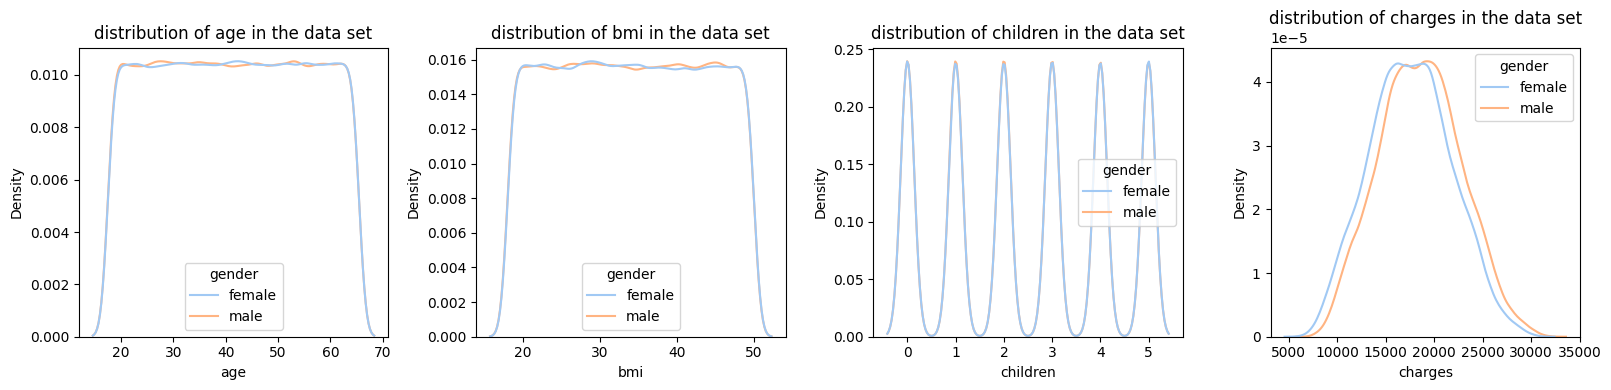

plot number coverage_level:  12%|█▎        | 1/8 [00:20<02:20, 20.01s/it]

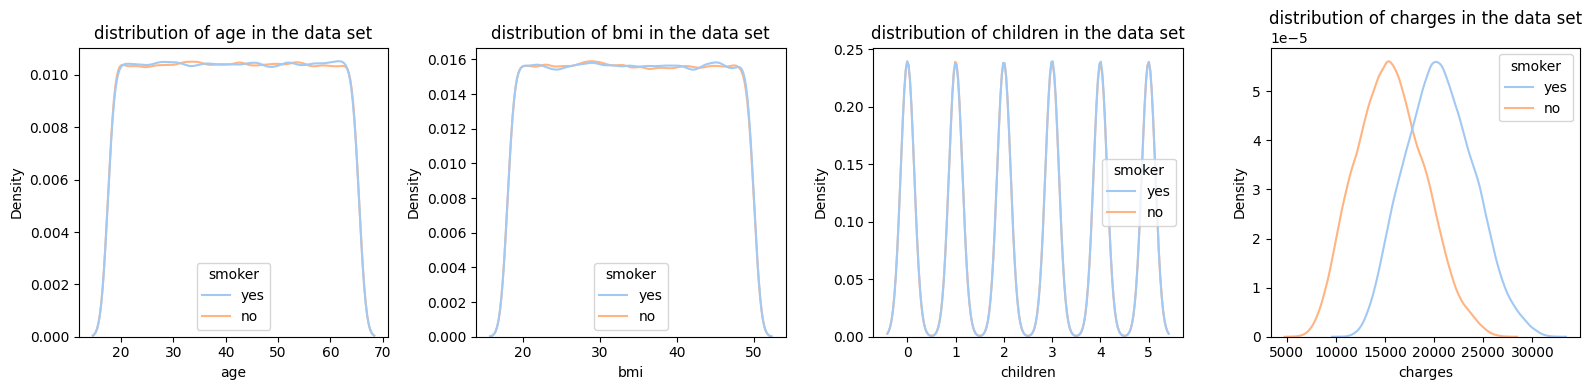

plot number coverage_level:  25%|██▌       | 2/8 [00:40<02:02, 20.38s/it]

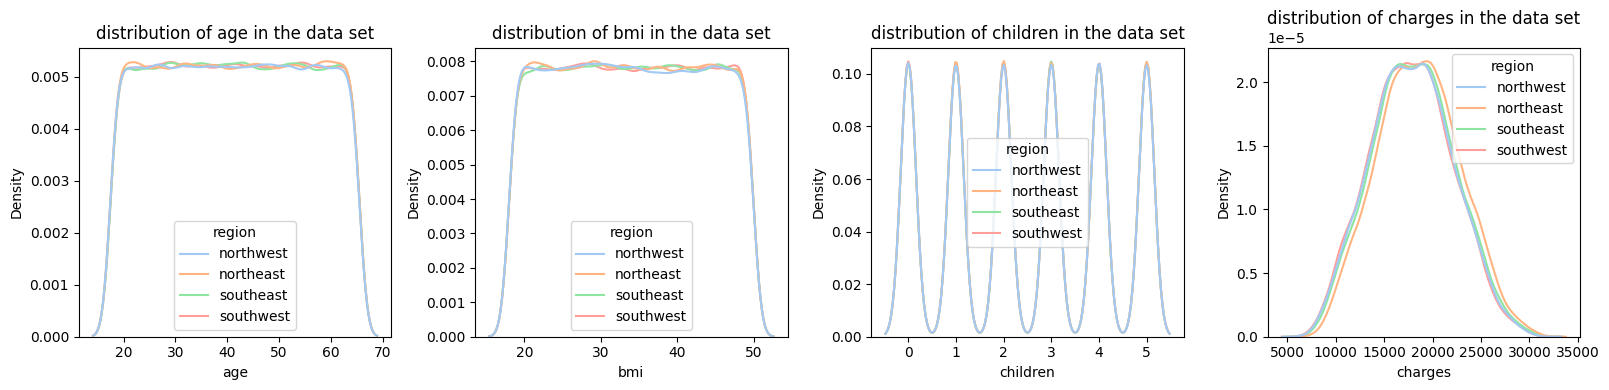

plot number coverage_level:  38%|███▊      | 3/8 [01:03<01:48, 21.61s/it]

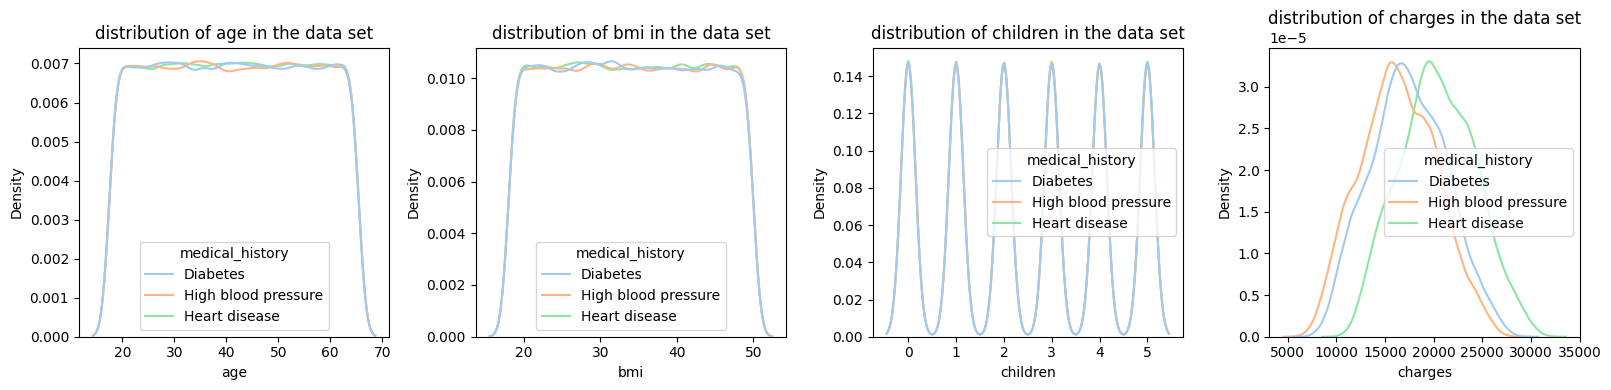

plot number coverage_level:  50%|█████     | 4/8 [01:26<01:28, 22.04s/it]

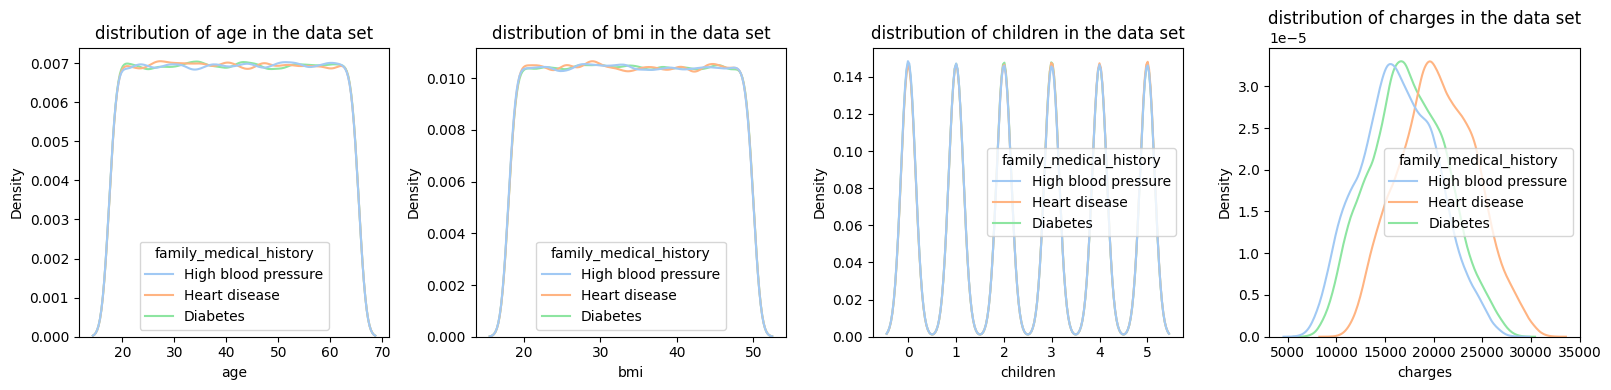

plot number coverage_level:  62%|██████▎   | 5/8 [01:48<01:05, 21.98s/it]

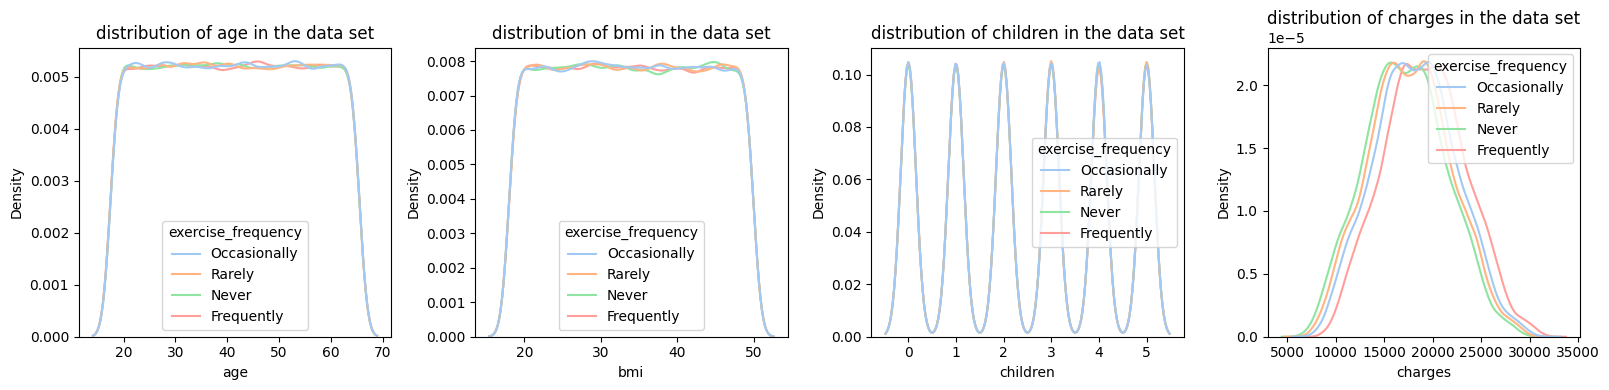

plot number coverage_level:  75%|███████▌  | 6/8 [02:10<00:44, 22.21s/it]

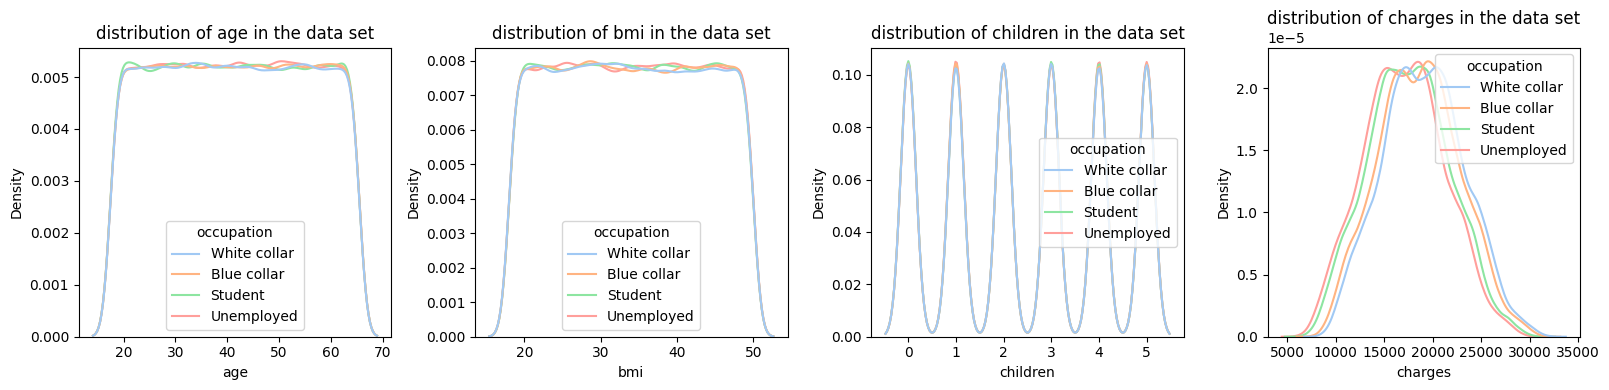

plot number coverage_level:  88%|████████▊ | 7/8 [02:32<00:21, 21.98s/it]

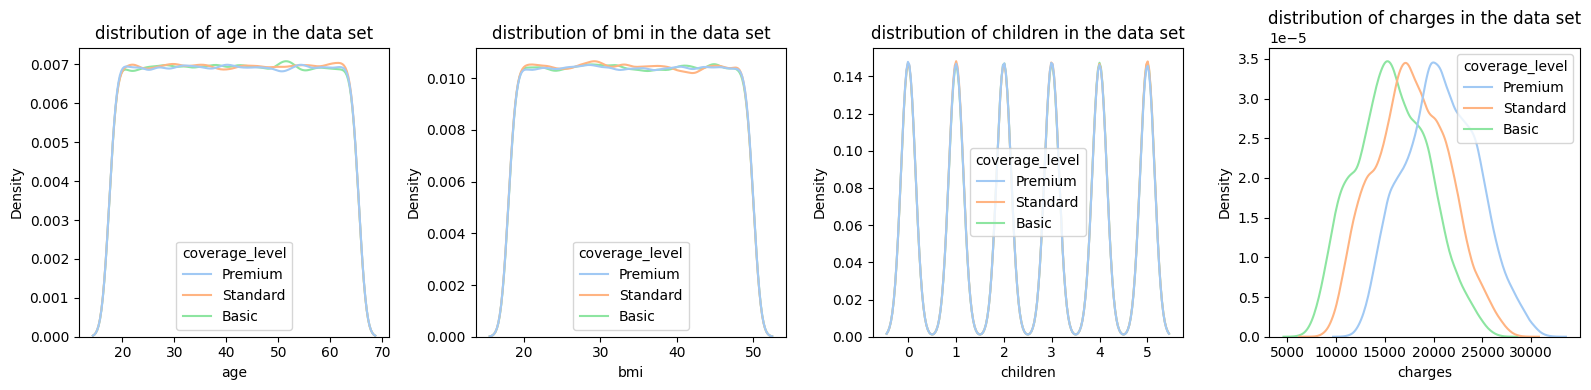

plot number coverage_level: 100%|██████████| 8/8 [02:53<00:00, 21.71s/it]


In [37]:
for col in tqdm(categ_col,desc=f'plot name  {col}'):
    plots(df, col)
    plt.show()

In [38]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')

---
### categrical factors that influences the insurance charge

In [77]:
results = {}
for col in tqdm(categ_col):
    results[col] = df.groupby(col).agg(
        avg_charge=('charges', 'mean'),
        variation_charge=('charges', 'std')
    ).reset_index()


100%|██████████| 8/8 [00:00<00:00, 23.64it/s]


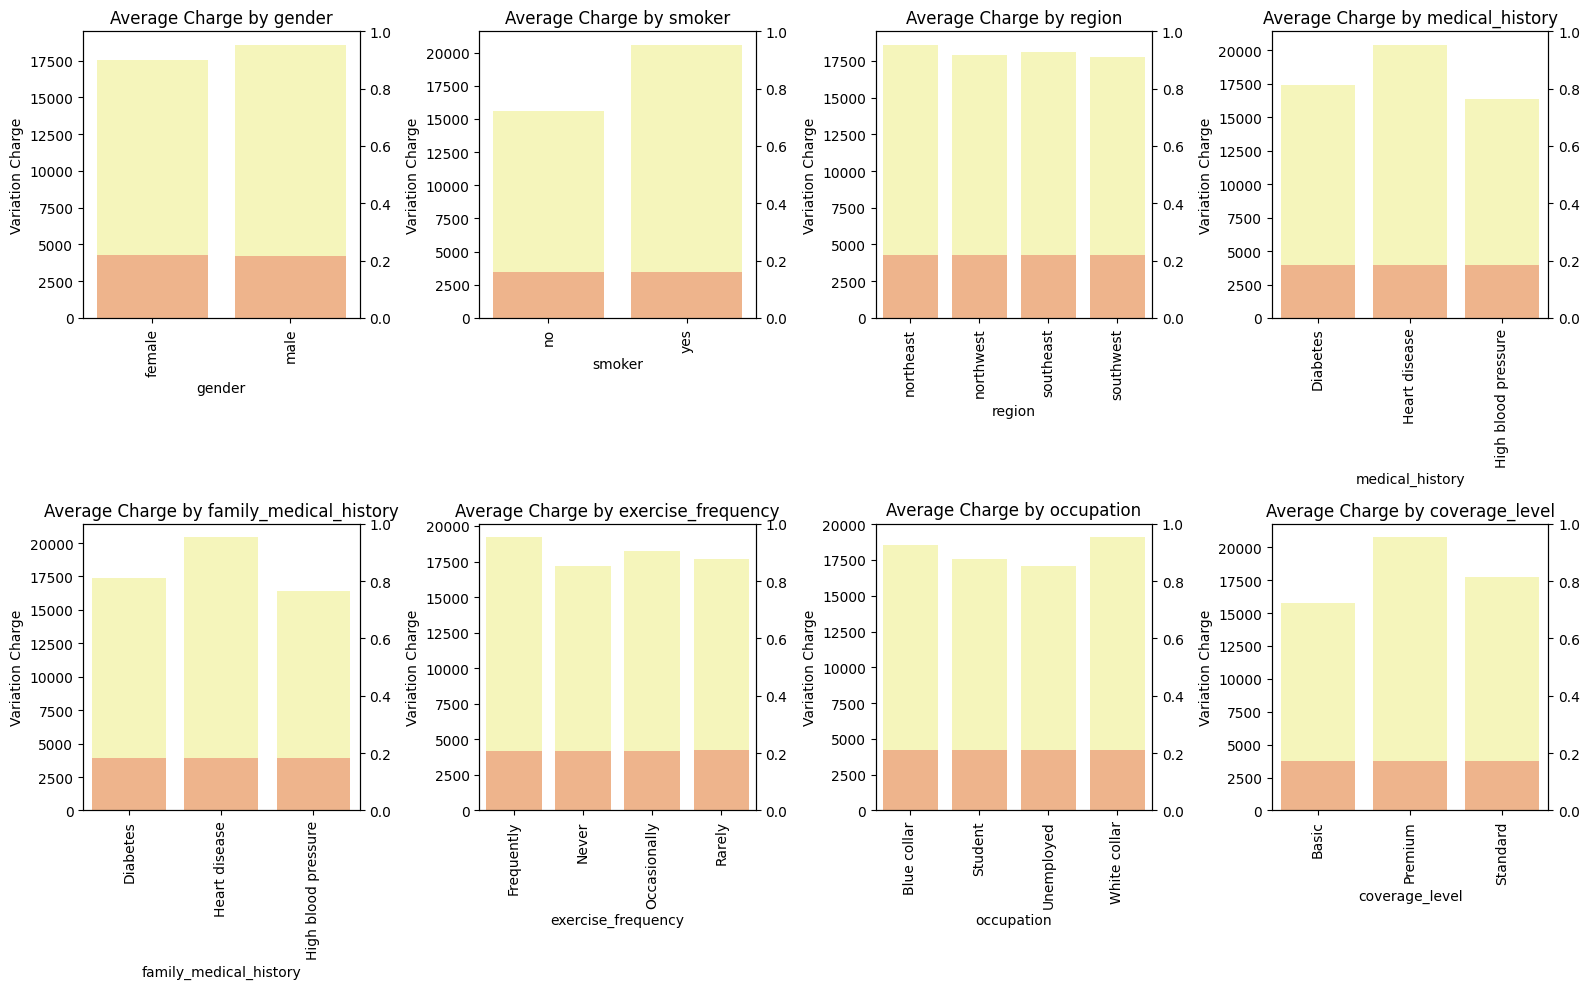

In [122]:
fig, ax = plt.subplots(2, 4, figsize=(16, 10))
ax = ax.flatten()
for i, col in enumerate(categ_col):
    g = results[col]
    sns.barplot(data=g, x=col, y=g.columns[1], ax=ax[i],color='yellow',alpha=0.3)
    ax[i].set_title(f'Average Charge by {col}')
    ax[i].set_ylabel('Average Charge')
    ax[i].set_xlabel(col)
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].twinx()
    sns.barplot(data=g, x=col, y=g.columns[2], ax=ax[i], color='r', alpha=0.3)
    ax[i].set_ylabel('Variation Charge')
plt.tight_layout()
plt.show()


In [127]:
results = {}
for col in tqdm(num_col[:3]):
    results[col] = df.groupby(col)['charges'].mean().reset_index()
    

100%|██████████| 3/3 [00:00<00:00, 45.52it/s]


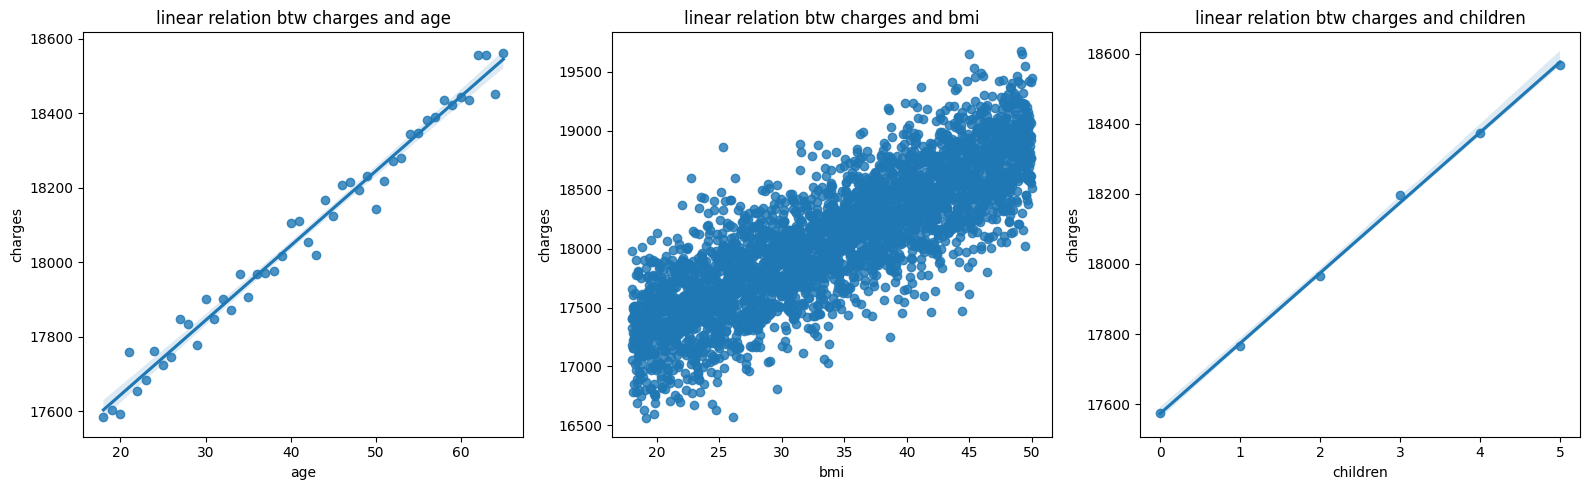

In [136]:
fig , ax = plt.subplots(1,3,figsize=(16,5))
ax=ax.flatten()
for i,col in enumerate(num_col[:3]):
    g = results[col]
    sns.regplot(g,x=col,y='charges',ax=ax[i])
    ax[i].set_title(f'linear relation btw charges and {col}')
plt.tight_layout()

from the regression plot we can see that there is a Positive linear relation between the average Charges and age meaning that the older the cliznt get the more expensive he need to pay also with having children  the more children you have the more you need to pay  and finaly with the body mass index that calculates the 

<Axes: xlabel='age', ylabel='bmi'>

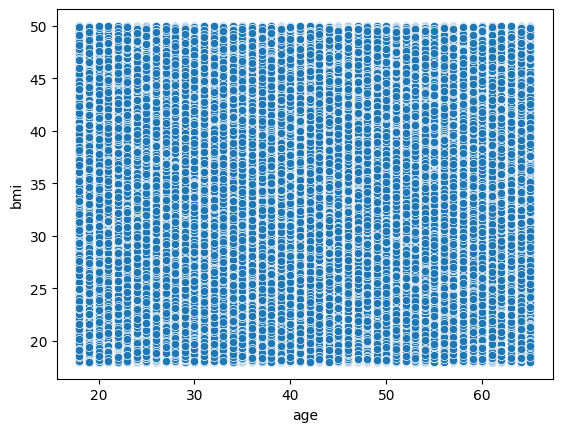

In [154]:
sns.scatterplot(df,x='age',y='bmi')

<Axes: >

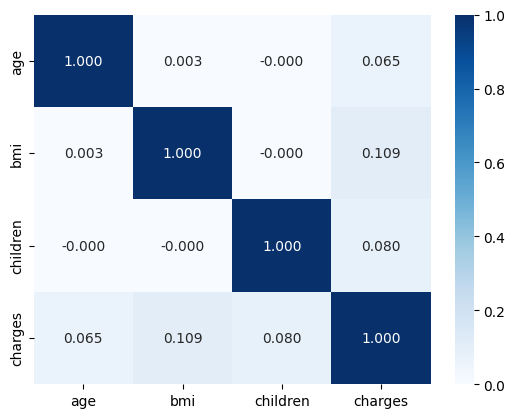

In [153]:
sns.heatmap(df[num_col].corr(), annot=True, cmap='Blues', fmt='.3f')